# PROJECT - MACHINE LEARNING - MARRIPALLY RAVIKUMAR

## PROBLEM 1

### Problem Statement

* You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Q1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

### Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install termcolor

In [3]:
from termcolor import colored

### Loading the Dataset

In [4]:
df=pd.read_excel('Election_Data.xlsx')

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df.columns=df.columns.str.replace('.','_')
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [9]:
df.shape

(1525, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


### Data Types of Features

In [11]:
pd.DataFrame(df.dtypes,columns=['Data Type']).rename_axis(index='Feature').T

Feature,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
Data Type,object,int64,int64,int64,int64,int64,int64,int64,object


In [12]:
cat=df.columns.drop(['vote','age'])
cat

Index(['economic_cond_national', 'economic_cond_household', 'Blair', 'Hague',
       'Europe', 'political_knowledge', 'gender'],
      dtype='object')

## Description of the Dataset

### Continuous Numerical Features

In [13]:
pd.DataFrame(df.age.describe().round(1)).T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.2,15.7,24.0,41.0,53.0,67.0,93.0


### Discrete Categorical Features

In [14]:
df[cat].astype('object').describe().T

,count,unique,top,freq
economic_cond_national,1525,5,3,607
economic_cond_household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political_knowledge,1525,4,2,782
gender,1525,2,female,812


### Check Null Values

In [15]:
pd.DataFrame(df.isnull().sum(),index=df.columns,
columns=['Number_of_Null_Values']).rename_axis(index='Feature').sort_values(by='Number_of_Null_Values',ascending=False)

,Number_of_Null_Values
Feature,
vote,0
age,0
economic_cond_national,0
economic_cond_household,0
Blair,0
Hague,0
Europe,0
political_knowledge,0
gender,0


### Skewness and Kurtosis

In [16]:
df.age.skew().round(2)

0.14

In [17]:
df.age.kurtosis().round(2)

-0.95

## Q1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

## Exploratory Data Analysis

### Check Duplicated Observations

In [18]:
df.duplicated().sum()

8

In [19]:
df[df.duplicated()==True]

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

## Checking for Anomalies

### Checking Value Counts in Categorical Variables

In [22]:
for i in df[cat].columns:
    print('Feature: ', i)
    print(round(df[i].value_counts(normalize=True)*100,2))
    print('----------------------------------------------')

Feature:  economic_cond_national
3    39.82
4    35.46
2    16.88
5     5.41
1     2.44
Name: economic_cond_national, dtype: float64
----------------------------------------------
Feature:  economic_cond_household
3    42.52
4    28.68
2    18.46
5     6.06
1     4.28
Name: economic_cond_household, dtype: float64
----------------------------------------------
Feature:  Blair
4    54.91
2    28.61
5    10.02
1     6.39
3     0.07
Name: Blair, dtype: float64
----------------------------------------------
Feature:  Hague
2    40.67
4    36.72
1    15.36
5     4.81
3     2.44
Name: Hague, dtype: float64
----------------------------------------------
Feature:  Europe
11    22.28
6     13.65
3      8.44
4      8.31
5      8.11
9      7.32
8      7.32
1      7.19
10     6.66
7      5.67
2      5.08
Name: Europe, dtype: float64
----------------------------------------------
Feature:  political_knowledge
2    51.15
0    29.93
3    16.41
1     2.50
Name: political_knowledge, dtype: float64
-----

### Checking Unique Entries in Categorical Variables

In [23]:
for i in df[cat].columns:
    print('Feature: ', i)
    print(df[i].unique())
    print('----------------------------')

Feature:  economic_cond_national
[3 4 2 1 5]
----------------------------
Feature:  economic_cond_household
[3 4 2 1 5]
----------------------------
Feature:  Blair
[4 5 2 1 3]
----------------------------
Feature:  Hague
[1 4 2 5 3]
----------------------------
Feature:  Europe
[ 2  5  3  4  6 11  1  7  9 10  8]
----------------------------
Feature:  political_knowledge
[2 0 3 1]
----------------------------
Feature:  gender
['female' 'male']
----------------------------


### Checking Outliers in Continuous Numerical Features

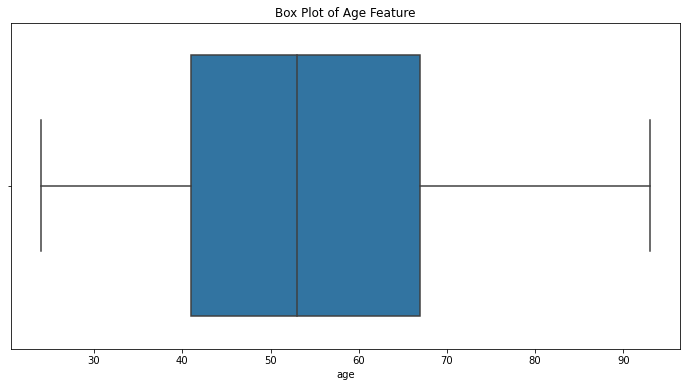

In [24]:
plt.figure(figsize=(12,6));
sns.boxplot(df.age);
plt.title('Box Plot of Age Feature');

## Univariate Analysis

### Histogram, Boxplot and Swarmplot of Continuous Numerical Features

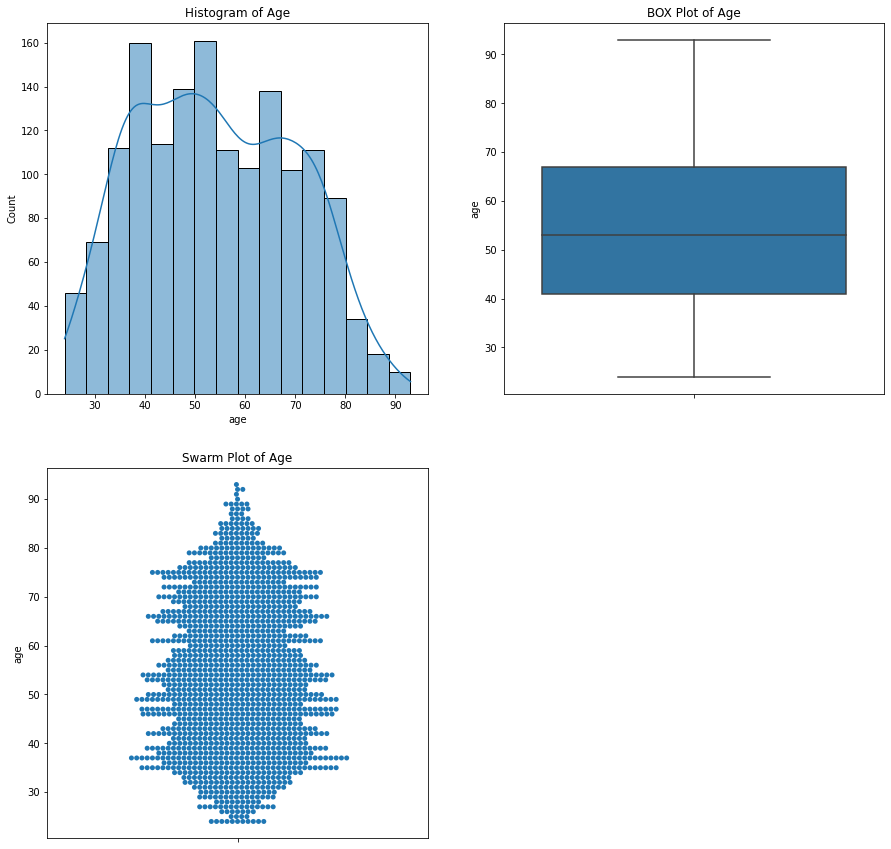

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(x=df.age,kde=True);
plt.title('Histogram of Age');
plt.subplot(2,2,2)
sns.boxplot(y=df.age);
plt.title('BOX Plot of Age');
plt.subplot(2,2,3)
sns.swarmplot(y=df.age);
plt.title('Swarm Plot of Age');

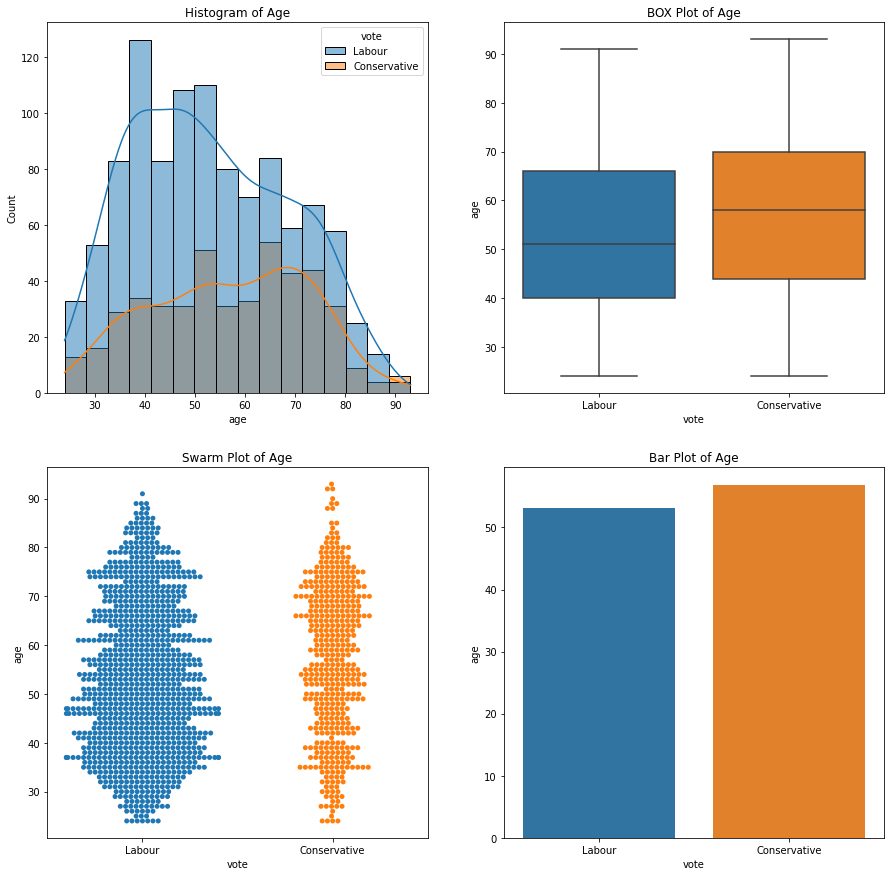

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(x=df.age,kde=True,hue=df.vote);
plt.title('Histogram of Age');
plt.subplot(2,2,2)
sns.boxplot(y=df.age,x=df.vote);
plt.title('BOX Plot of Age');
plt.subplot(2,2,3)
sns.swarmplot(y=df.age,x=df.vote);
plt.title('Swarm Plot of Age');
plt.subplot(2,2,4)
sns.barplot(y=df.age,x=df.vote,ci=False);
plt.title('Bar Plot of Age');

### Count Plots of Categorical Features

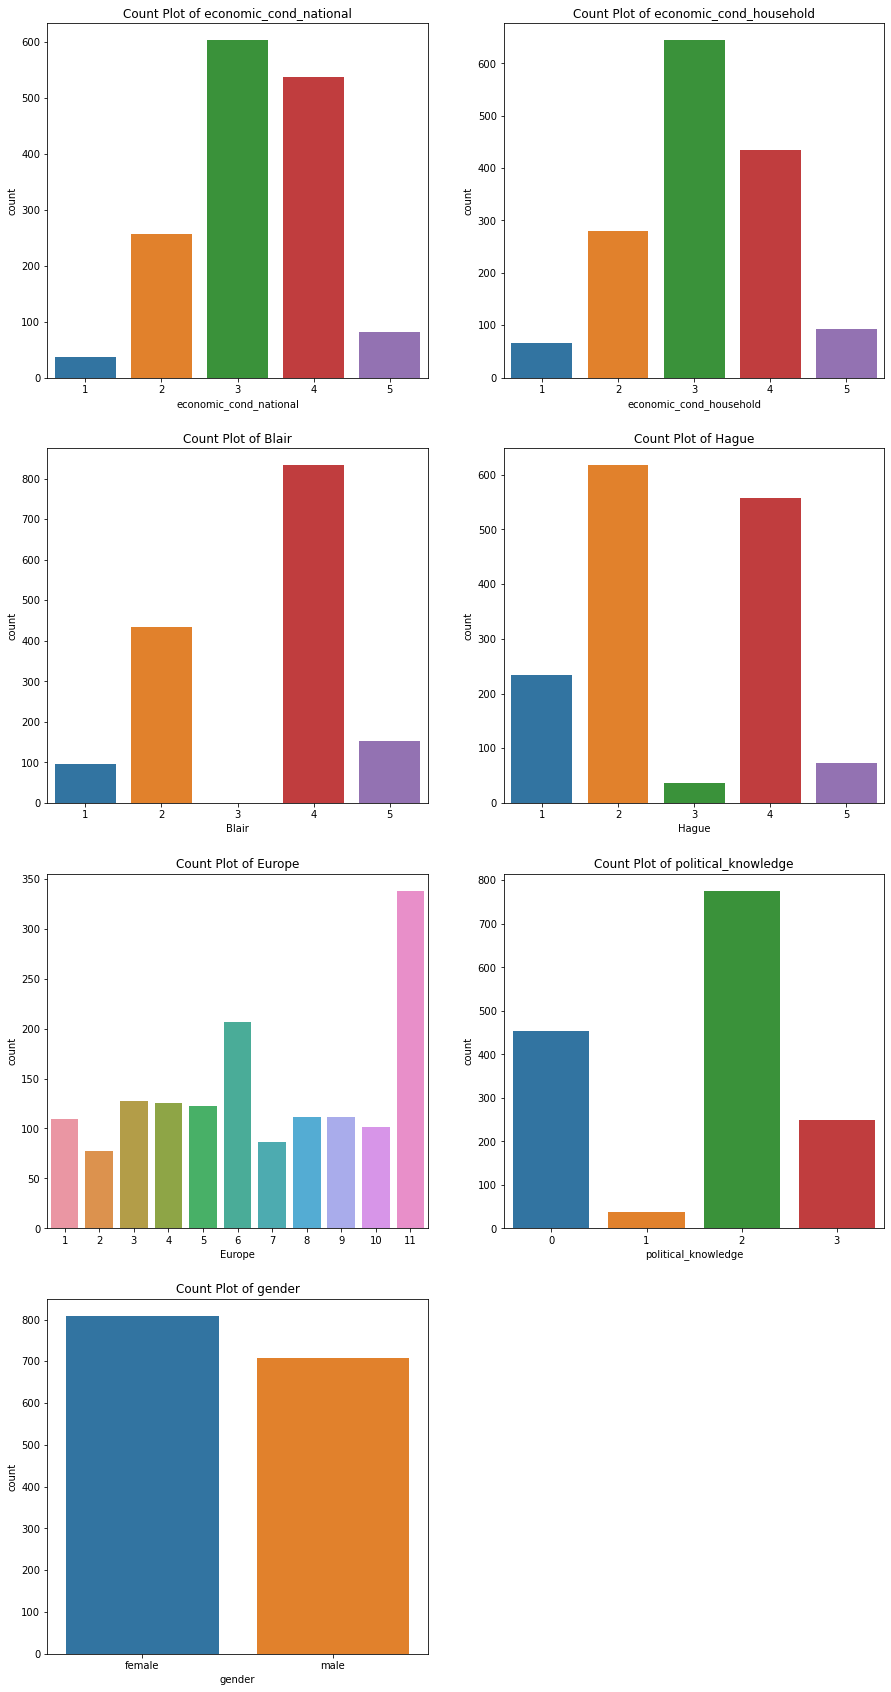

In [27]:
plt.figure(figsize=(15,30))
j=1
for i in df[cat].columns:
    plt.subplot(4,2,j)
    sns.countplot(df[i]);
    plt.title('Count Plot of '+i)
    j=j+1

In [28]:
df.Europe.value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

### Check Distribution of Classes in Target Column

In [29]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [30]:
round(df.vote.value_counts(normalize=True)*100,2)

Labour          69.68
Conservative    30.32
Name: vote, dtype: float64

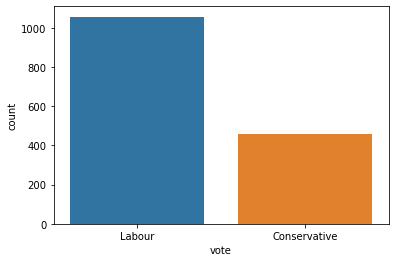

In [31]:
sns.countplot(df.vote);

## Bivariate Analysis

### Pair Plot of Numerical Features

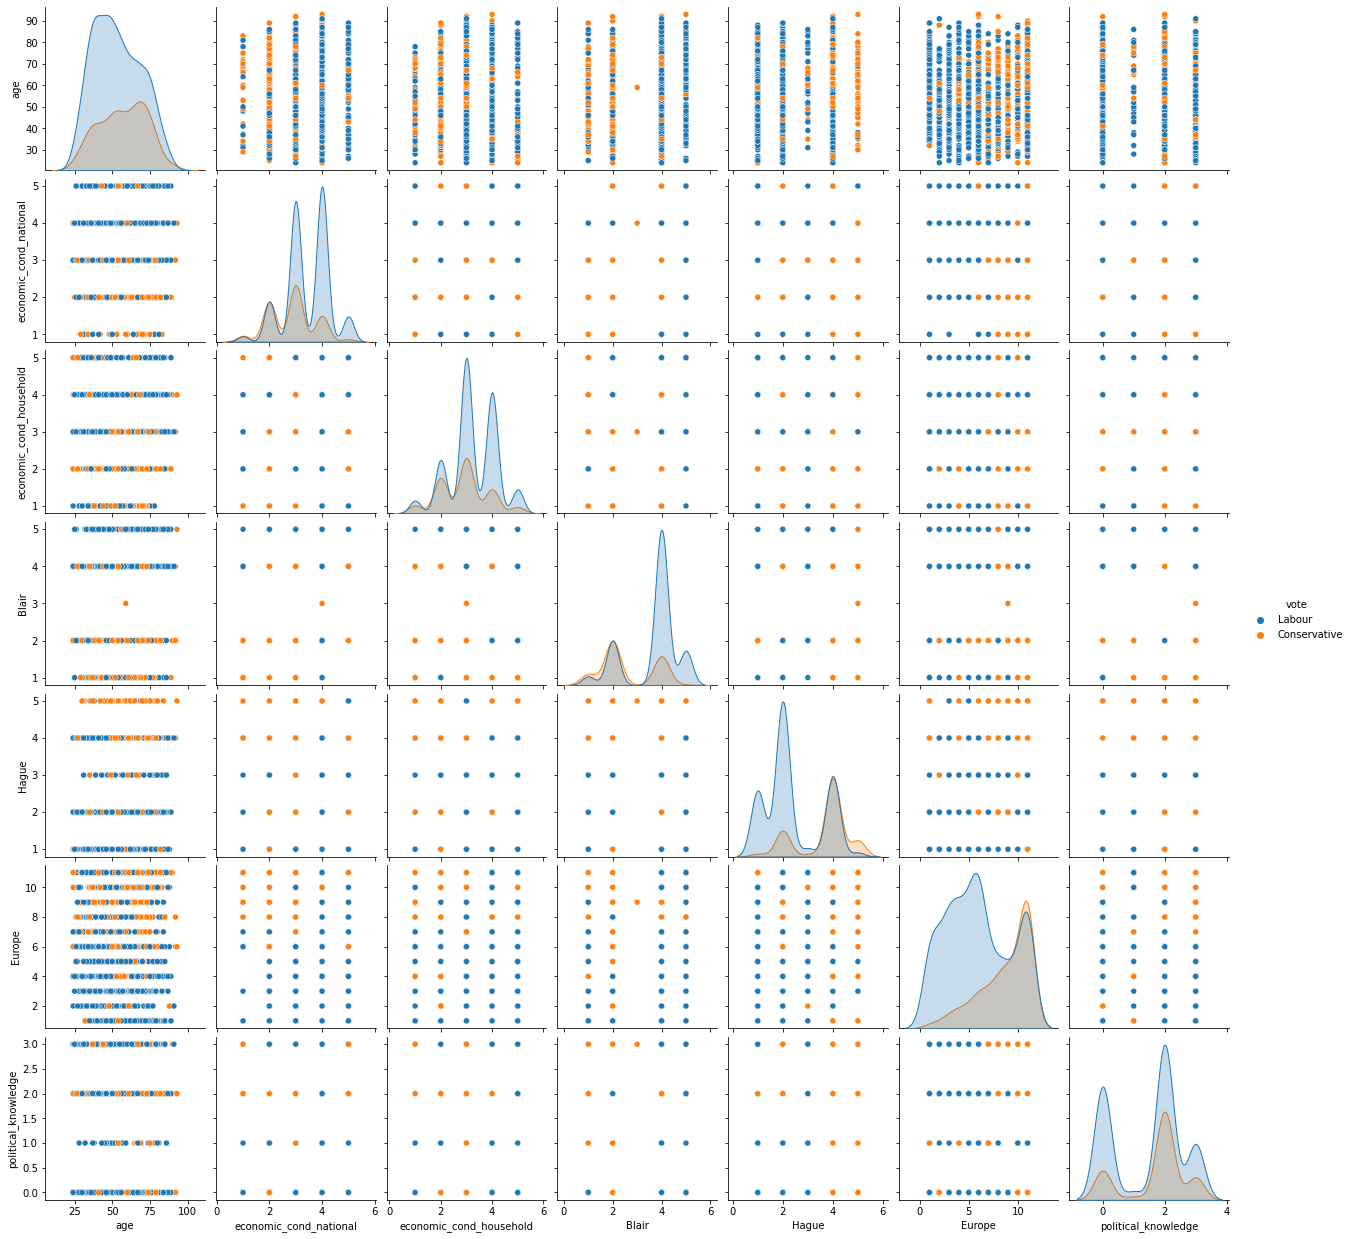

In [32]:
sns.pairplot(data=df,hue='vote');

### Heatmap of Numerical Features

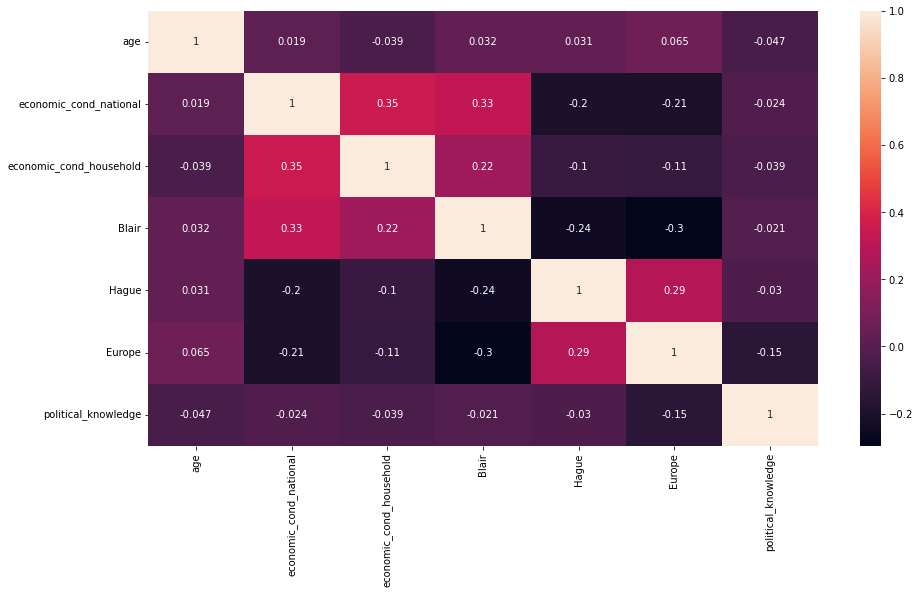

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

### Box Plots of Continuous Numerical Features Vs Vote

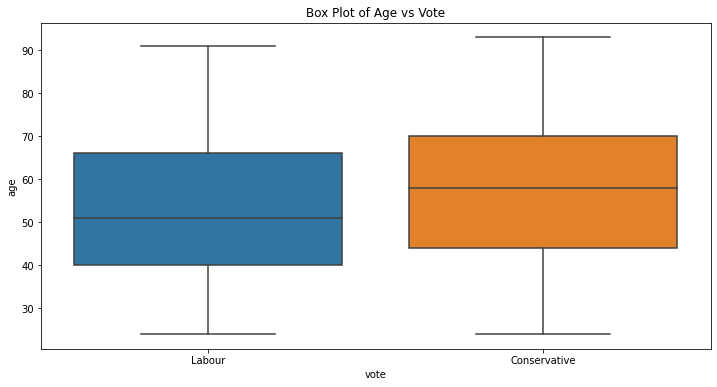

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df.age,x=df.vote);
plt.title('Box Plot of Age vs Vote');

### Count Plots of Categorical Features with Hue as Vote

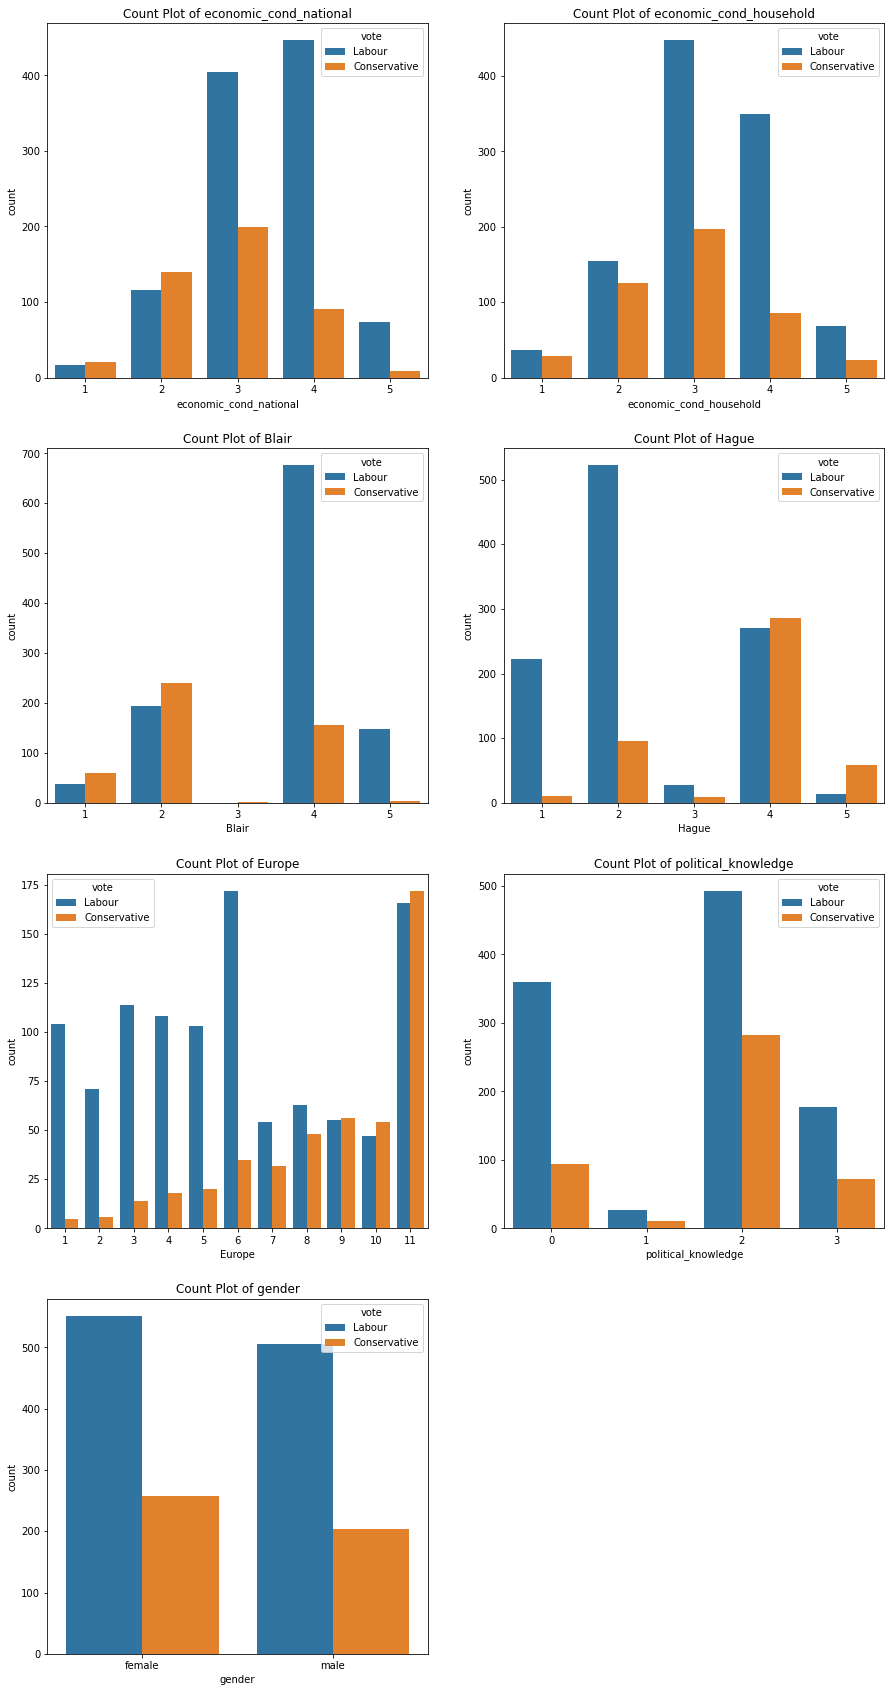

In [35]:
plt.figure(figsize=(15,30))
j=1
for i in df[cat].columns:
    plt.subplot(4,2,j)
    sns.countplot(df[i],hue=df.vote);
    plt.title('Count Plot of '+i)
    j=j+1

## Q1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [36]:
a=df.describe().T
a['variance']=a['std']**2
a=a[['count', 'mean', 'std','variance', 'min', '25%', '50%', '75%', 'max']]
a.T.round(1)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
count,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0
mean,54.2,3.2,3.1,3.3,2.7,6.7,1.5
std,15.7,0.9,0.9,1.2,1.2,3.3,1.1
variance,246.5,0.8,0.9,1.4,1.5,10.9,1.2
min,24.0,1.0,1.0,1.0,1.0,1.0,0.0
25%,41.0,3.0,3.0,2.0,2.0,4.0,0.0
50%,53.0,3.0,3.0,4.0,2.0,6.0,2.0
75%,67.0,4.0,4.0,4.0,4.0,10.0,2.0
max,93.0,5.0,5.0,5.0,5.0,11.0,3.0


### Splitting the Data

In [37]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political_knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [39]:
df_encoded=df.copy()

In [40]:
df_encoded.vote=np.where(df_encoded.vote=='Conservative',1,0)

In [41]:
df_encoded.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,0,43,3,3,4,1,2,2,female
1,0,36,4,4,4,4,5,2,male
2,0,35,4,4,5,2,3,2,male
3,0,24,4,2,2,1,4,0,female
4,0,41,2,2,1,1,6,2,male


In [42]:
df_encoded=pd.get_dummies(df_encoded,columns=['gender'],drop_first=True)

In [43]:
df_encoded.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [44]:
x=df_encoded.drop('vote',axis=1)
y=df_encoded.vote

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.3, random_state=1)

In [47]:
print('size of xtrain: ',xtrain.shape)
print('size of xtest: ',xtest.shape)
print('size of ytrain: ',ytrain.shape)
print('size of ytest: ',ytest.shape)

size of xtrain:  (1061, 8)
size of xtest:  (456, 8)
size of ytrain:  (1061,)
size of ytest:  (456,)


In [48]:
xtrain.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [49]:
xtest.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1


In [50]:
ytrain.head()

991     1
1274    0
649     1
677     0
538     0
Name: vote, dtype: int32

In [51]:
ytest.head()

504     0
369     0
1075    0
1031    1
1329    0
Name: vote, dtype: int32

In [52]:
round(ytrain.value_counts(normalize=True)*100,2)

0    71.07
1    28.93
Name: vote, dtype: float64

In [53]:
round(ytest.value_counts(normalize=True)*100,2)

0    66.45
1    33.55
Name: vote, dtype: float64

### Preparation of Scaled Datasets

In [54]:
xtrain.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [55]:
xtest.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1


In [56]:
xtrain_scaled=xtrain.copy()
xtest_scaled=xtest.copy()

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss=StandardScaler()

In [59]:
scaling_features=xtrain.columns.drop('gender_male')
scaling_features

Index(['age', 'economic_cond_national', 'economic_cond_household', 'Blair',
       'Hague', 'Europe', 'political_knowledge'],
      dtype='object')

In [60]:
xtrain_scaled[scaling_features]=ss.fit_transform(xtrain_scaled[scaling_features])
xtest_scaled[scaling_features]=ss.transform(xtest_scaled[scaling_features])

In [61]:
xtrain_scaled.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
991,-1.296710,-1.455581,0.902100,-2.018037,1.029070,1.332089,0.452231,0
1274,-0.910337,0.877307,-0.163744,0.550300,1.029070,-0.202156,-1.407526,1
649,0.441968,0.877307,-0.163744,0.550300,1.029070,0.104693,0.452231,0
677,-0.459569,-0.289137,-0.163744,0.550300,-0.593283,1.332089,-1.407526,1
538,-0.652755,2.043751,-0.163744,0.550300,-0.593283,0.411542,-1.407526,1


In [62]:
xtest_scaled.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
504,1.085923,-0.289137,-0.163744,-1.161925,-0.593283,0.411542,0.452231,0
369,-0.717151,-0.289137,-1.229589,0.550300,-0.593283,0.411542,1.382110,1
1075,2.245042,2.043751,1.967945,1.406413,-0.593283,-1.736401,0.452231,1
1031,-0.459569,-1.455581,-0.163744,-1.161925,1.029070,0.411542,0.452231,0
1329,-1.361106,2.043751,0.902100,0.550300,1.029070,0.411542,-1.407526,1


##  Q1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

## Q1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

## Q1.6  Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Building Models - with Default Parameters

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

Model: LogisticRegression(random_state=1) 

Confusion matrix of Train Dataset 

          Predicted 0  Predicted 1
Actual 0          686           68
Actual 1          111          196 

Classification Report of Train Dataset 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Confusion matrix of Test Dataset 

          Predicted 0  Predicted 1
Actual 0          268           35
Actual 1           41          112 

Classification Report of Test Dataset 

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.73      0.75       153

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81

Model: GradientBoostingClassifier(random_state=1) 

Confusion matrix of Train Dataset 

          Predicted 0  Predicted 1
Actual 0          708           46
Actual 1           68          239 

Classification Report of Train Dataset 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Confusion matrix of Test Dataset 

          Predicted 0  Predicted 1
Actual 0          276           27
Actual 1           48          105 

Classification Report of Test Dataset 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.80      0.69      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80  

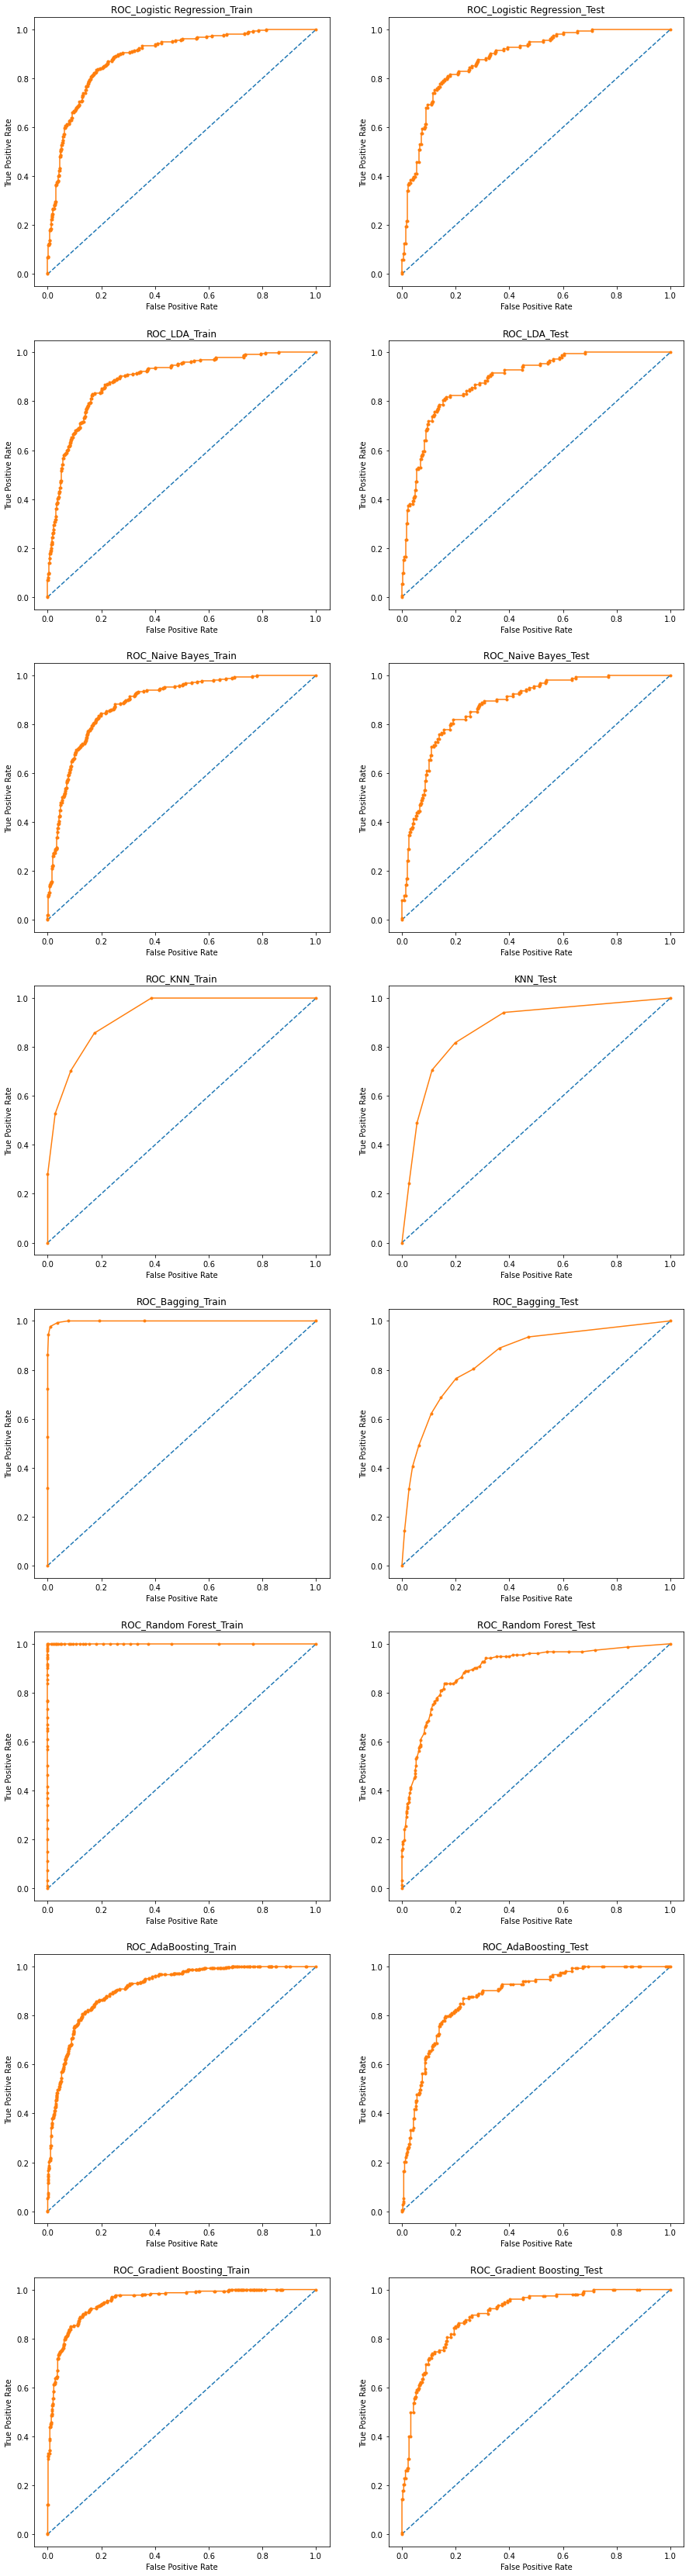

In [64]:
lgrm=LogisticRegression(random_state=1)
ldam=LinearDiscriminantAnalysis()
nbm=GaussianNB()
knnm=KNeighborsClassifier()
bgm=BaggingClassifier(random_state=1)
rfm = RandomForestClassifier(random_state=1)
abm=AdaBoostClassifier(random_state=1)
gbm=GradientBoostingClassifier(random_state=1)

models=[lgrm, ldam, nbm, knnm, bgm, rfm, abm, gbm]

titles=['ROC_Logistic Regression_Train', 'ROC_Logistic Regression_Test',
             'ROC_LDA_Train', 'ROC_LDA_Test','ROC_Naive Bayes_Train','ROC_Naive Bayes_Test','ROC_KNN_Train','KNN_Test',
             'ROC_Bagging_Train', 'ROC_Bagging_Test','ROC_Random Forest_Train','ROC_Random Forest_Test',
             'ROC_AdaBoosting_Train','ROC_AdaBoosting_Test',
            'ROC_Gradient Boosting_Train','ROC_Gradient Boosting_Test']

accuracy_train=[]
auc_train=[]
precision_conservative_train=[]
recall_conservative_train=[]
f1score_conservative_train=[]
precision_Labour_train=[]
recall_Labour_train=[]
f1score_Labour_train=[]

accuracy_test=[]
auc_test=[]
precision_conservative_test=[]
recall_conservative_test=[]
f1score_conservative_test=[]
precision_Labour_test=[]
recall_Labour_test=[]
f1score_Labour_test=[]

def performance_metrics_train(xtrue, ytrue, y_pred, y_prob1):
    accuracy_train.append(i.score(xtrue, ytrue))
    auc_train.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_conservative_train.append(a.iloc[1,0])
    recall_conservative_train.append(a.iloc[1,1])
    f1score_conservative_train.append(a.iloc[1,2])
    precision_Labour_train.append(a.iloc[0,0])
    recall_Labour_train.append(a.iloc[0,1])
    f1score_Labour_train.append(a.iloc[0,2])

def performance_metrics_test(xtrue, ytrue, y_pred, y_prob1):
    accuracy_test.append(i.score(xtrue, ytrue))
    auc_test.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_conservative_test.append(a.iloc[1,0])
    recall_conservative_test.append(a.iloc[1,1])
    f1score_conservative_test.append(a.iloc[1,2])
    precision_Labour_test.append(a.iloc[0,0])
    recall_Labour_test.append(a.iloc[0,1])
    f1score_Labour_test.append(a.iloc[0,2])

def ROC(true,prob,m):    
    fpr_train,tpr_train,thr_train=roc_curve(true,prob)
    plt.title(titles[m])
    plt.plot([0, 1], [0, 1], linestyle='--');
    plt.plot(fpr_train,tpr_train,marker='.');
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(15,60))
j=1
for i in models:
    if i in [nbm,bgm,rfm,abm,gbm]:
        i.fit(xtrain,ytrain)
        
        # Predictions_train
        ytrain_pred=i.predict(xtrain)
        ytrain_prob1=i.predict_proba(xtrain)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain, ytrain, ytrain_pred, ytrain_prob1)

        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytrain,ytrain_pred),'\n')
        
        # ROC-AUC curve_train
        plt.subplot(8,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred=i.predict(xtest)
        ytest_prob1=i.predict_proba(xtest)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest, ytest, ytest_pred, ytest_prob1)
        
        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytest,ytest_pred))
        print('--------------------------------------------------------------------------------------------------------')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(8,2,k)
        ROC(ytest,ytest_prob1,(k-1))
      
        j=k+1

    else:
        i.fit(xtrain_scaled,ytrain)
        
        # Predictions_train
        ytrain_pred=i.predict(xtrain_scaled)
        ytrain_prob1=i.predict_proba(xtrain_scaled)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_scaled, ytrain, ytrain_pred, ytrain_prob1)        
        
        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytrain,ytrain_pred),'\n')
        
        # ROC-AUC curve_train
        plt.subplot(8,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        
        # Predictions_test
        ytest_pred=i.predict(xtest_scaled)
        ytest_prob1=i.predict_proba(xtest_scaled)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_scaled, ytest, ytest_pred, ytest_prob1)

        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytest,ytest_pred))
        print('-------------------------------------------------------------------------------------------------------')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(8,2,k)
        ROC(ytest,ytest_prob1,(k-1))
        j=k+1

Performance_Metrics_Before_Tuning=pd.DataFrame(
    {'Accuracy_Train':accuracy_train,
     'Accuracy_Test':accuracy_test,
    'AUC_Train': auc_train,
     'AUC_Test': auc_test,
    'Precision_Conservative_Train': precision_conservative_train,
     'Precision_Conservative_Test': precision_conservative_test,
    'Recall_Conservative_Train': recall_conservative_train,
     'Recall_Conservative_Test': recall_conservative_test,
    'F1score_Conservative_Train': f1score_conservative_train,
     'F1score_Conservative_Test': f1score_conservative_test,
     'Precision_Labour_Train': precision_Labour_train,
     'Precision_Labour_Test': precision_Labour_test,
    'Recall_Labour_Train': recall_Labour_train,
     'Recall_Labour_Test': recall_Labour_test,
    'F1score_Labour_Train': f1score_Labour_train,
    'F1score_Labour_Test': f1score_Labour_test},
               
    index=['Logistic Regression', 'LDA','Naive Bayes','KNN',
            'Bagging','Random Forest','AdaBoosting','Gradient Boosting']).round(2)

In [65]:
Performance_Metrics_Before_Tuning.T

,Logistic Regression,LDA,Naive Bayes,KNN,Bagging,Random Forest,AdaBoosting,Gradient Boosting
Accuracy_Train,0.83,0.83,0.84,0.85,0.98,1.00,0.85,0.89
Accuracy_Test,0.83,0.83,0.82,0.83,0.80,0.83,0.81,0.84
AUC_Train,0.89,0.89,0.89,0.93,1.00,1.00,0.91,0.95
AUC_Test,0.88,0.89,0.88,0.87,0.85,0.90,0.88,0.90
Precision_Conservative_Train,0.74,0.74,0.73,0.77,0.99,1.00,0.76,0.84
Precision_Conservative_Test,0.76,0.77,0.74,0.76,0.74,0.79,0.74,0.80
Recall_Conservative_Train,0.64,0.65,0.69,0.70,0.94,1.00,0.68,0.78
Recall_Conservative_Test,0.73,0.73,0.73,0.71,0.62,0.67,0.69,0.69
F1score_Conservative_Train,0.69,0.69,0.71,0.73,0.97,1.00,0.72,0.81
F1score_Conservative_Test,0.75,0.74,0.73,0.73,0.68,0.72,0.71,0.74


## Feature_Importances

### Logistic Regression Model

In [66]:
pd.DataFrame(lgrm.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,key=abs).T.round(3)

Predictor,Hague,Blair,Europe,economic_cond_national,political_knowledge,age,gender_male,economic_cond_household
Coefficients,1.012,-0.7,0.684,-0.54,0.345,0.231,-0.192,-0.059


### LDA Model

In [67]:
pd.DataFrame(ldam.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,key=abs).T.round(3)

Predictor,Hague,Blair,Europe,economic_cond_national,political_knowledge,age,gender_male,economic_cond_household
Coefficients,1.142,-0.867,0.729,-0.519,0.463,0.311,-0.149,-0.047


### Random Forest Model

In [68]:
pd.DataFrame(rfm.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,age,Europe,Hague,Blair,economic_cond_national,economic_cond_household,political_knowledge,gender_male
Feature_Importances,0.213,0.188,0.179,0.133,0.092,0.081,0.078,0.036


### AdaBoosting Model

In [69]:
pd.DataFrame(abm.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,age,Europe,Blair,Hague,economic_cond_household,economic_cond_national,political_knowledge,gender_male
Feature_Importances,0.4,0.2,0.14,0.12,0.08,0.04,0.02,0.0


### Gradient Boosting Model

In [70]:
pd.DataFrame(gbm.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,Hague,Blair,Europe,age,political_knowledge,economic_cond_national,economic_cond_household,gender_male
Feature_Importances,0.344,0.187,0.175,0.097,0.087,0.077,0.031,0.002


## Tuning Hyperparameters

### Using GridsearchCV for Logistic Regression Model

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid_lgrm = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lgrm = LogisticRegression(max_iter=10000, random_state=1)
gscv_lgrm = GridSearchCV(estimator = lgrm, param_grid = param_grid_lgrm)

In [73]:
gscv_lgrm.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=1),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [74]:
gscv_lgrm.best_params_

{'solver': 'newton-cg'}

### Using GridsearchCV for LDA Model

In [75]:
param_grid_ldam = {'solver': ['svd', 'lsqr', 'eigen']}
ldam = LinearDiscriminantAnalysis()
gscv_ldam = GridSearchCV(estimator = ldam, param_grid = param_grid_ldam)

In [76]:
gscv_ldam.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [77]:
gscv_ldam.best_params_

{'solver': 'svd'}

### Optimization of K in KNN Model

In [78]:
accuracy_train_knnm=[]
accuracy_test_knnm=[]
for i in range(20,80):
    knnm=KNeighborsClassifier(n_neighbors=i)
    knnm.fit(xtrain_scaled,ytrain)
    accuracy_train_knnm.append(knnm.score(xtrain_scaled,ytrain))
    accuracy_test_knnm.append(knnm.score(xtest_scaled,ytest))

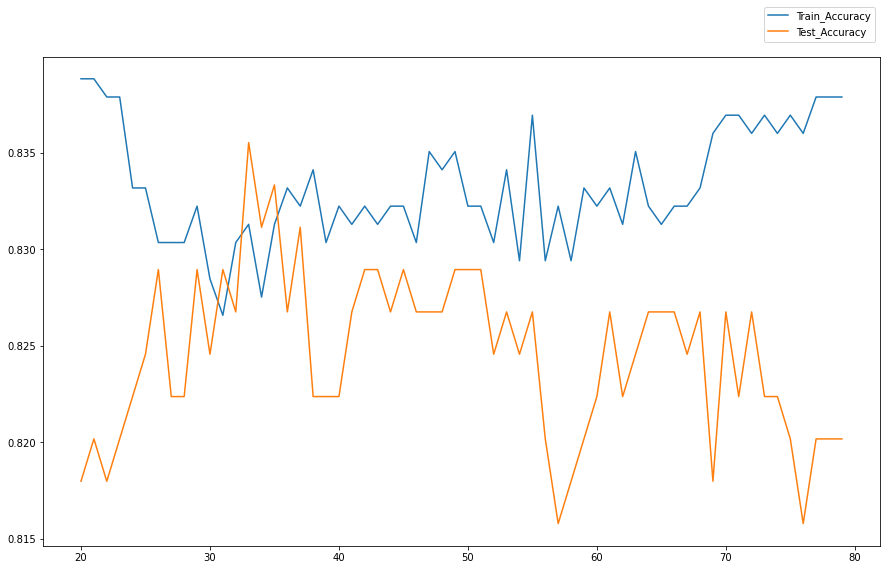

In [79]:
plt.figure(figsize=(15,9))
plt.plot(range(20,80),accuracy_train_knnm,label='Train_Accuracy');
plt.plot(range(20,80),accuracy_test_knnm,label='Test_Accuracy');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

In [80]:
#'weights': ['uniform', 'distance']

In [81]:
param_grid_knnm = {'n_neighbors': [41,45,51,55,61,65,71]}
knnm = KNeighborsClassifier()
gscv_knnm = GridSearchCV(estimator = knnm, param_grid = param_grid_knnm)

In [82]:
gscv_knnm.fit(xtrain_scaled,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [41, 45, 51, 55, 61, 65, 71]})

In [83]:
gscv_knnm.best_params_

{'n_neighbors': 61}

### Using GridsearchCV for Bagging

In [84]:
param_grid = {'n_estimators': [51,75,101]}
bgm = BaggingClassifier(random_state=1)
gscv_bgm = GridSearchCV(estimator = bgm, param_grid = param_grid)

In [85]:
gscv_bgm.fit(xtrain,ytrain)

GridSearchCV(estimator=BaggingClassifier(random_state=1),
             param_grid={'n_estimators': [51, 75, 101]})

In [86]:
gscv_bgm.best_params_

{'n_estimators': 75}

### Using GridsearchCV for Random Forest Model

In [87]:
param_grid = {
     'max_depth': [7,8,9],
     'max_features': [3,4,5],
    'min_samples_leaf': [1,5,10], 
    'min_samples_split': [2,15,30],
     'n_estimators': [25,51,101]}
rfm = RandomForestClassifier(random_state=1)
gscv_rfm = GridSearchCV(estimator = rfm, param_grid = param_grid)

In [88]:
gscv_rfm.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'n_estimators': [51, 75, 101]})

In [89]:
gscv_rfm.best_params_

{'n_estimators': 75}

### Using GridsearchCV for Ada Boosting

In [90]:
param_grid = {'n_estimators': [15,25,50]}
abm = AdaBoostClassifier(random_state=1)
gscv_abm = GridSearchCV(estimator = abm, param_grid = param_grid)

In [91]:
gscv_abm.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [15, 25, 50]})

In [92]:
gscv_abm.best_params_

{'n_estimators': 25}

### Using GridsearchCV for Gradient Boosting

In [93]:
param_grid = {'n_estimators': [25,51,101],
             'max_depth': [1,2,3], 
            'min_samples_leaf': [5,10,15], 
            'min_samples_split': [2,15,30]}
gbm = GradientBoostingClassifier(random_state=1)
gscv_gbm = GridSearchCV(estimator = gbm, param_grid = param_grid)

In [94]:
gscv_gbm.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [2, 15, 30],
                         'n_estimators': [25, 51, 101]})

In [95]:
gscv_gbm.best_params_

{'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 51}

## Q1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### Building Models - After Tuning Hyperparameters

Model: LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg') 

Confusion matrix of Train Dataset 

          Predicted 0  Predicted 1
Actual 0          686           68
Actual 1          111          196 

Classification Report of Train Dataset 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Confusion matrix of Test Dataset 

          Predicted 0  Predicted 1
Actual 0          268           35
Actual 1           41          112 

Classification Report of Test Dataset 

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.73      0.75       153

    accuracy                           0.83       456
   macr

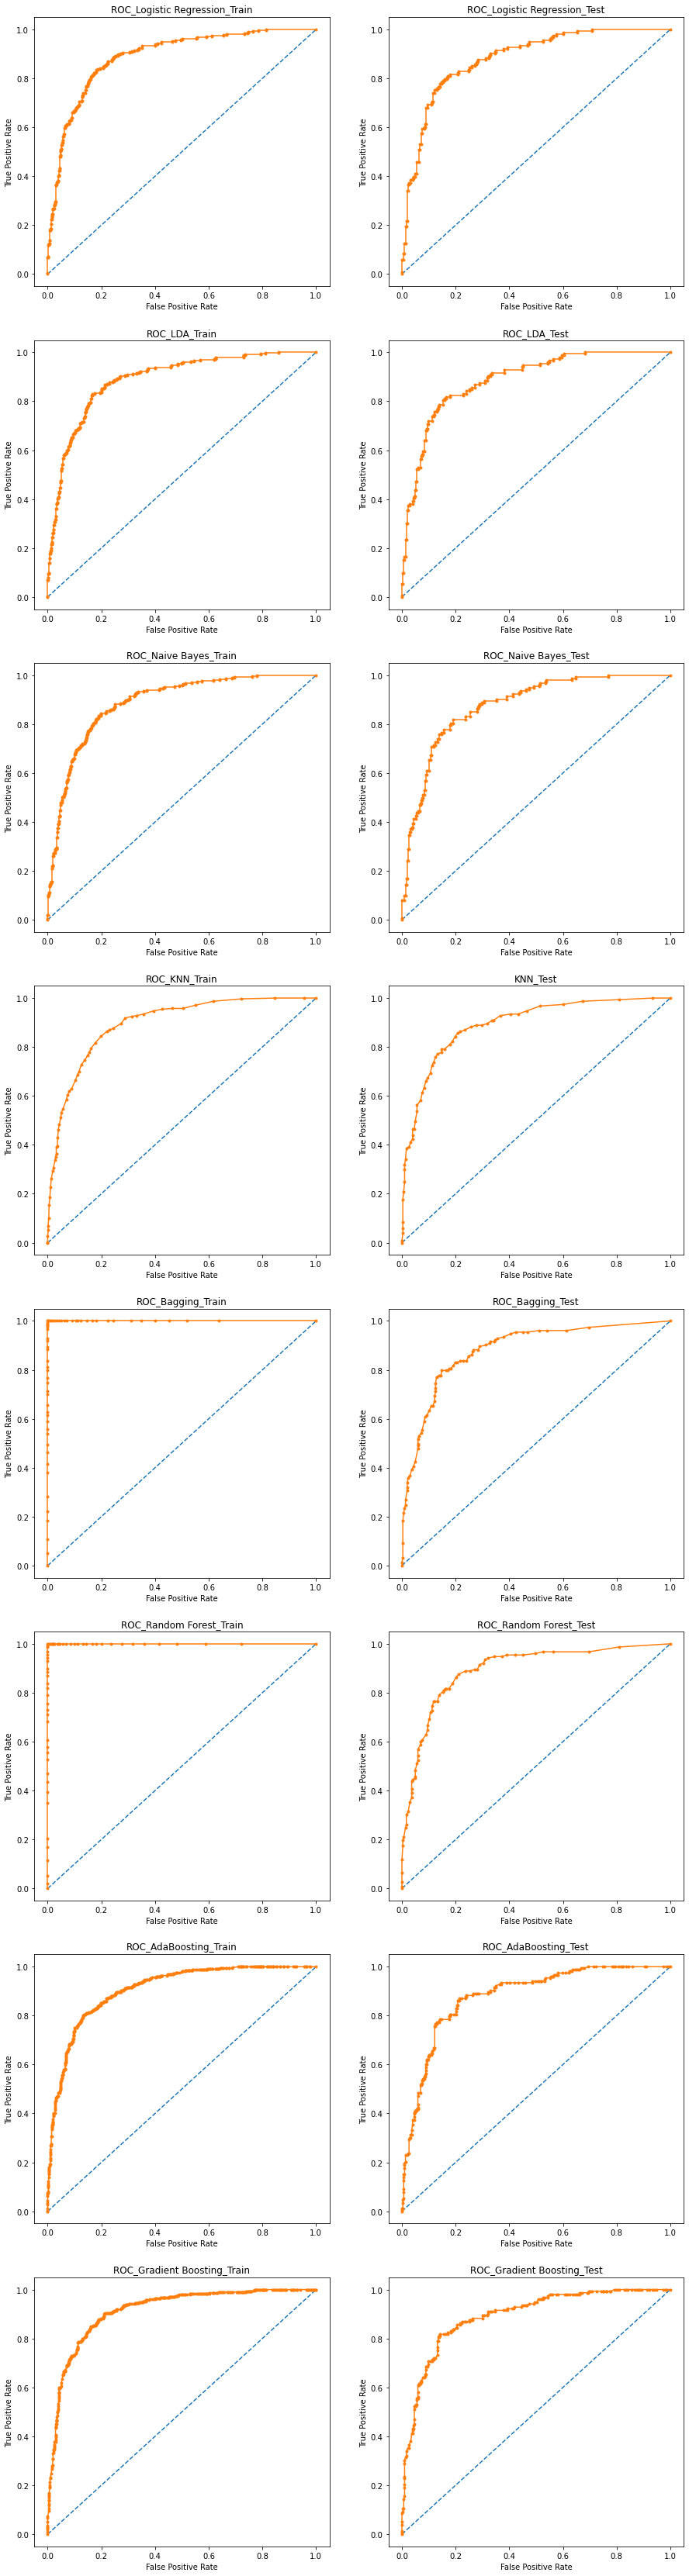

In [96]:
lgrmf=gscv_lgrm.best_estimator_
ldamf=gscv_ldam.best_estimator_
nbm=GaussianNB()
knnmf=gscv_knnm.best_estimator_
bgmf=gscv_bgm.best_estimator_
rfmf = gscv_rfm.best_estimator_
abmf=gscv_abm.best_estimator_
gbmf=gscv_gbm.best_estimator_

models=[lgrmf, ldamf, nbm, knnmf, bgmf, rfmf, abmf, gbmf]

titles=['ROC_Logistic Regression_Train', 'ROC_Logistic Regression_Test',
             'ROC_LDA_Train', 'ROC_LDA_Test','ROC_Naive Bayes_Train','ROC_Naive Bayes_Test','ROC_KNN_Train','KNN_Test',
             'ROC_Bagging_Train', 'ROC_Bagging_Test','ROC_Random Forest_Train','ROC_Random Forest_Test',
             'ROC_AdaBoosting_Train','ROC_AdaBoosting_Test',
            'ROC_Gradient Boosting_Train','ROC_Gradient Boosting_Test']

accuracy_train=[]
auc_train=[]
precision_conservative_train=[]
recall_conservative_train=[]
f1score_conservative_train=[]
precision_Labour_train=[]
recall_Labour_train=[]
f1score_Labour_train=[]

accuracy_test=[]
auc_test=[]
precision_conservative_test=[]
recall_conservative_test=[]
f1score_conservative_test=[]
precision_Labour_test=[]
recall_Labour_test=[]
f1score_Labour_test=[]

def performance_metrics_train(xtrue, ytrue, y_pred, y_prob1):
    accuracy_train.append(i.score(xtrue, ytrue))
    auc_train.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_conservative_train.append(a.iloc[1,0])
    recall_conservative_train.append(a.iloc[1,1])
    f1score_conservative_train.append(a.iloc[1,2])
    precision_Labour_train.append(a.iloc[0,0])
    recall_Labour_train.append(a.iloc[0,1])
    f1score_Labour_train.append(a.iloc[0,2])

def performance_metrics_test(xtrue, ytrue, y_pred, y_prob1):
    accuracy_test.append(i.score(xtrue, ytrue))
    auc_test.append(roc_auc_score(ytrue,y_prob1))
    a=pd.DataFrame(classification_report(ytrue,y_pred,output_dict=True)).T
    precision_conservative_test.append(a.iloc[1,0])
    recall_conservative_test.append(a.iloc[1,1])
    f1score_conservative_test.append(a.iloc[1,2])
    precision_Labour_test.append(a.iloc[0,0])
    recall_Labour_test.append(a.iloc[0,1])
    f1score_Labour_test.append(a.iloc[0,2])

def ROC(true,prob,m):    
    fpr_train,tpr_train,thr_train=roc_curve(true,prob)
    plt.title(titles[m])
    plt.plot([0, 1], [0, 1], linestyle='--');
    plt.plot(fpr_train,tpr_train,marker='.');
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(15,60))
j=1
for i in models:
    if i in [rfmf, nbm,bgmf,abmf,gbmf]:
        i.fit(xtrain,ytrain)
        
        # Predictions_train
        ytrain_pred=i.predict(xtrain)
        ytrain_prob1=i.predict_proba(xtrain)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain, ytrain, ytrain_pred, ytrain_prob1)

        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytrain,ytrain_pred),'\n')
        
        # ROC-AUC curve_train
        plt.subplot(8,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        # Predictions_test
        ytest_pred=i.predict(xtest)
        ytest_prob1=i.predict_proba(xtest)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest, ytest, ytest_pred, ytest_prob1)
        
        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytest,ytest_pred))
        print('-------------------------------------------------------------------------------------------------------')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(8,2,k)
        ROC(ytest,ytest_prob1,(k-1))
      
        j=k+1

    else:
        i.fit(xtrain_scaled,ytrain)
        
        ytrain_pred=i.predict(xtrain_scaled)
        ytrain_prob1=i.predict_proba(xtrain_scaled)[:,1]
        
        # Performance metrics_train
        performance_metrics_train(xtrain_scaled, ytrain, ytrain_pred, ytrain_prob1)        
        
        # Confusion Matrix_train
        print('Model:', i,'\n')
        print(colored('Confusion matrix of Train Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytrain,ytrain_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_train
        print(colored('Classification Report of Train Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytrain,ytrain_pred),'\n')
        
        # ROC-AUC curve_train
        plt.subplot(8,2,j)
        ROC(ytrain,ytrain_prob1,(j-1))
        
        ytest_pred=i.predict(xtest_scaled)
        ytest_prob1=i.predict_proba(xtest_scaled)[:,1]
        
        # Performance metrics_test
        performance_metrics_test(xtest_scaled, ytest, ytest_pred, ytest_prob1)

        # Confusion Matrix_test
        print(colored('Confusion matrix of Test Dataset','blue',attrs=['bold']),'\n')
        print(pd.DataFrame(confusion_matrix(ytest,ytest_pred),index=['Actual 0','Actual 1'],
                           columns=['Predicted 0','Predicted 1']),'\n')
        
        # Classification report_test
        print(colored('Classification Report of Test Dataset','blue',attrs=['bold']),'\n')
        print(classification_report(ytest,ytest_pred))
        print('-------------------------------------------------------------------------------------------------------')
        
        # ROC-AUC curve_test
        k=j+1
        plt.subplot(8,2,k)
        ROC(ytest,ytest_prob1,(k-1))
        j=k+1

Performance_Metrics_After_Tuning=pd.DataFrame(
    {'Accuracy_Train':accuracy_train,
     'Accuracy_Test':accuracy_test,
    'AUC_Train': auc_train,
     'AUC_Test': auc_test,
    'Precision_Conservative_Train': precision_conservative_train,
     'Precision_Conservative_Test': precision_conservative_test,
    'Recall_Conservative_Train': recall_conservative_train,
     'Recall_Conservative_Test': recall_conservative_test,
    'F1score_Conservative_Train': f1score_conservative_train,
     'F1score_Conservative_Test': f1score_conservative_test,
     'Precision_Labour_Train': precision_Labour_train,
     'Precision_Labour_Test': precision_Labour_test,
    'Recall_Labour_Train': recall_Labour_train,
     'Recall_Labour_Test': recall_Labour_test,
    'F1score_Labour_Train': f1score_Labour_train,
    'F1score_Labour_Test': f1score_Labour_test},
               
    index=['Logistic Regression', 'LDA','Naive Bayes','KNN',
            'Bagging','Random Forest','AdaBoosting','Gradient Boosting']).round(2)      

In [97]:
Performance_Metrics_After_Tuning.T

,Logistic Regression,LDA,Naive Bayes,KNN,Bagging,Random Forest,AdaBoosting,Gradient Boosting
Accuracy_Train,0.83,0.83,0.84,0.83,1.00,1.00,0.85,0.86
Accuracy_Test,0.83,0.83,0.82,0.83,0.82,0.82,0.82,0.83
AUC_Train,0.89,0.89,0.89,0.90,1.00,1.00,0.91,0.92
AUC_Test,0.88,0.89,0.88,0.89,0.88,0.89,0.88,0.89
Precision_Conservative_Train,0.74,0.74,0.73,0.77,1.00,1.00,0.76,0.79
Precision_Conservative_Test,0.76,0.77,0.74,0.79,0.74,0.78,0.74,0.79
Recall_Conservative_Train,0.64,0.65,0.69,0.60,1.00,1.00,0.68,0.69
Recall_Conservative_Test,0.73,0.73,0.73,0.66,0.71,0.67,0.70,0.69
F1score_Conservative_Train,0.69,0.69,0.71,0.68,1.00,1.00,0.72,0.74
F1score_Conservative_Test,0.75,0.74,0.73,0.72,0.73,0.72,0.72,0.73


### Feature_Importances

### Logistic Regression Model

In [98]:
pd.DataFrame(lgrmf.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,key=abs).T.round(3)

Predictor,Hague,Blair,Europe,economic_cond_national,political_knowledge,age,gender_male,economic_cond_household
Coefficients,1.012,-0.7,0.684,-0.54,0.345,0.231,-0.192,-0.059


### LDA Model

In [99]:
pd.DataFrame(ldamf.coef_.T,index=xtrain_scaled.columns, 
columns=['Coefficients']).rename_axis(index='Predictor').sort_values(by='Coefficients',ascending=False,key=abs).T.round(3)

Predictor,Hague,Blair,Europe,economic_cond_national,political_knowledge,age,gender_male,economic_cond_household
Coefficients,1.142,-0.867,0.729,-0.519,0.463,0.311,-0.149,-0.047


### Random Forest Model

In [100]:
pd.DataFrame(rfmf.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,age,Europe,Hague,Blair,economic_cond_national,economic_cond_household,political_knowledge,gender_male
Feature_Importances,0.215,0.186,0.179,0.135,0.093,0.081,0.075,0.036


### AdaBoosting Model

In [101]:
pd.DataFrame(abmf.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,age,Blair,Hague,Europe,economic_cond_household,economic_cond_national,political_knowledge,gender_male
Feature_Importances,0.28,0.16,0.16,0.16,0.12,0.08,0.04,0.0


### Gradient Boosting Model

In [102]:
pd.DataFrame(gbmf.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).T.round(3)

,Hague,Blair,Europe,economic_cond_national,political_knowledge,age,economic_cond_household,gender_male
Feature_Importances,0.368,0.22,0.205,0.084,0.082,0.037,0.004,0.0


# Models Comparision

### Before Tuning Hyperparameters

In [103]:
Performance_Metrics_Before_Tuning.T

,Logistic Regression,LDA,Naive Bayes,KNN,Bagging,Random Forest,AdaBoosting,Gradient Boosting
Accuracy_Train,0.83,0.83,0.84,0.85,0.98,1.00,0.85,0.89
Accuracy_Test,0.83,0.83,0.82,0.83,0.80,0.83,0.81,0.84
AUC_Train,0.89,0.89,0.89,0.93,1.00,1.00,0.91,0.95
AUC_Test,0.88,0.89,0.88,0.87,0.85,0.90,0.88,0.90
Precision_Conservative_Train,0.74,0.74,0.73,0.77,0.99,1.00,0.76,0.84
Precision_Conservative_Test,0.76,0.77,0.74,0.76,0.74,0.79,0.74,0.80
Recall_Conservative_Train,0.64,0.65,0.69,0.70,0.94,1.00,0.68,0.78
Recall_Conservative_Test,0.73,0.73,0.73,0.71,0.62,0.67,0.69,0.69
F1score_Conservative_Train,0.69,0.69,0.71,0.73,0.97,1.00,0.72,0.81
F1score_Conservative_Test,0.75,0.74,0.73,0.73,0.68,0.72,0.71,0.74


### After Tuning Hyperparameters

In [104]:
Performance_Metrics_After_Tuning.T

,Logistic Regression,LDA,Naive Bayes,KNN,Bagging,Random Forest,AdaBoosting,Gradient Boosting
Accuracy_Train,0.83,0.83,0.84,0.83,1.00,1.00,0.85,0.86
Accuracy_Test,0.83,0.83,0.82,0.83,0.82,0.82,0.82,0.83
AUC_Train,0.89,0.89,0.89,0.90,1.00,1.00,0.91,0.92
AUC_Test,0.88,0.89,0.88,0.89,0.88,0.89,0.88,0.89
Precision_Conservative_Train,0.74,0.74,0.73,0.77,1.00,1.00,0.76,0.79
Precision_Conservative_Test,0.76,0.77,0.74,0.79,0.74,0.78,0.74,0.79
Recall_Conservative_Train,0.64,0.65,0.69,0.60,1.00,1.00,0.68,0.69
Recall_Conservative_Test,0.73,0.73,0.73,0.66,0.71,0.67,0.70,0.69
F1score_Conservative_Train,0.69,0.69,0.71,0.68,1.00,1.00,0.72,0.74
F1score_Conservative_Test,0.75,0.74,0.73,0.72,0.73,0.72,0.72,0.73


## PROBLEM 2

### Problem Statement

* In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

## Q2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [105]:
import nltk
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\marri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [107]:
import string
from nltk.corpus import inaugural

In [108]:
inaugural.fileids()[0:10]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [109]:
len(inaugural.fileids())

59

In [110]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [111]:
inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [112]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [113]:
speech_titles=['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

In [114]:
speeches=[inaugural.raw(speech) for speech in speech_titles]

In [115]:
sp=pd.DataFrame({'speeches':speeches},index=speech_titles)
sp

,speeches
1941-Roosevelt.txt,On each national day of inauguration since 178...
1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### Count of Characters, Words and Sentences Excluding Spaces

In [116]:
sp['number_of_characters'] = sp.speeches.apply(lambda x: sum(len(word) for word in x.split()))
sp['number_of_words']=sp.speeches.apply(lambda x: len(x.split()))
sp['number_of_sentences'] = sp.speeches.apply(lambda x: len(sent_tokenize(x)))
sp.iloc[:,1:4]

,number_of_characters,number_of_words,number_of_sentences
1941-Roosevelt.txt,6174,1360,68
1961-Kennedy.txt,6202,1390,52
1973-Nixon.txt,8122,1819,68


### Count of Characters, Words and Sentences Including Spaces

In [117]:
number_of_characters=[len(inaugural.raw(speech)) for speech in speech_titles]
number_of_words=[len(inaugural.words(speech)) for speech in speech_titles]
number_of_sentences=[len(inaugural.sents(speech)) for speech in speech_titles]
pd.DataFrame({'number_of_characters': number_of_characters,
              'number_of_words': number_of_words,
              'number_of_sentences': number_of_sentences},
            index=speech_titles).rename_axis(index='speech_titles')

,number_of_characters,number_of_words,number_of_sentences
speech_titles,,,
1941-Roosevelt.txt,7571,1536,68
1961-Kennedy.txt,7618,1546,52
1973-Nixon.txt,9991,2028,69


## Q2.2 Remove all the stopwords from all three speeches.

### Lower Case conversion

In [118]:
sp_cleaned=pd.DataFrame(sp.speeches)

In [119]:
sp_cleaned.head()

,speeches
1941-Roosevelt.txt,On each national day of inauguration since 178...
1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [120]:
sp_cleaned.speeches = sp_cleaned.speeches.apply(lambda x: " ".join(word.lower() for word in x.split()))

### Removing Special Characters

In [121]:
sp_cleaned.speeches = sp_cleaned.speeches.str.replace('[^\w\s]','')

### Removing Stopwords

In [122]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [123]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [124]:
len(stopwords)

211

### Stopwords in Speeches

In [125]:
print(sp_cleaned.speeches.apply(lambda x: {word for word in x.split() if word in stopwords})[0])

{'a', 'and', 'been', 'do', 'here', 'some', 'below', 'i', 'are', 'who', 'on', 'in', 'no', 'from', 'by', 'when', 'these', 'itself', 'has', 'such', 'through', 'it', 'have', 'was', 'their', 'is', 'his', 'each', 'be', 'will', 'more', 'own', 'with', 'so', 'does', 'an', 'because', 'of', 'or', 'what', 'other', 'the', 'but', 'into', 'they', 'out', 'at', 'should', 'its', 'than', 'most', 'we', 'there', 'not', 'them', 'to', 'for', 'if', 'our', 'before', 'were', 'up', 'this', 'which', 'that', 'those', 'as', 'all', 'then'}


In [126]:
sp_cleaned.speeches = sp_cleaned.speeches.apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

In [127]:
### Lemmatization

In [128]:
# from nltk.stem import WordNetLemmatizer
# lm = WordNetLemmatizer()
# sp_cleaned.speeches=sp_cleaned.speeches.apply(lambda x: " ".join(lm.lemmatize(word) for word in x.split()))
# sp_cleaned.speeches[0]

### Stemming

In [129]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
sp_cleaned.speeches=sp_cleaned.speeches.apply(lambda x: " ".join(st.stem(word) for word in x.split()))
sp_cleaned.speeches[0]

'nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain

### Count of Characters, Words and Sentences Excluding Spaces after Cleaning

In [130]:
sp_cleaned['number_of_characters_after_cleaning'] = sp_cleaned.speeches.apply(lambda x: sum(len(word) for word in x.split()))
sp_cleaned['number_of_words_after_cleaning']=sp_cleaned.speeches.apply(lambda x: len(x.split(" ")))
sp_cleaned.iloc[:,1:3]

,number_of_characters_after_cleaning,number_of_words_after_cleaning
1941-Roosevelt.txt,3418,627
1961-Kennedy.txt,3584,693
1973-Nixon.txt,4332,833


### Comparing Count of Words before and after Cleaning the Text

In [131]:
pd.concat([sp.drop(['speeches','number_of_sentences'],axis=1),sp_cleaned.drop('speeches',axis=1)],axis=1).sort_index(axis=1)

,number_of_characters,number_of_characters_after_cleaning,number_of_words,number_of_words_after_cleaning
1941-Roosevelt.txt,6174,3418,1360,627
1961-Kennedy.txt,6202,3584,1390,693
1973-Nixon.txt,8122,4332,1819,833


## Q2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words (after removing the stopwords).

In [132]:
nltk.FreqDist(sp_cleaned.speeches[0].split()).most_common(3)

[('nation', 17), ('know', 10), ('peopl', 9)]

In [133]:
nltk.FreqDist(sp_cleaned.speeches[1].split()).most_common(3)

[('let', 16), ('us', 12), ('power', 9)]

In [134]:
nltk.FreqDist(sp_cleaned.speeches[2].split()).most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

## Q2.4 Plot the word cloud of each of the three speeches (after removing the stopwords).

### Plotting the Wordcloud

Word Cloud for 1941-Roosevelt speech (after cleaning)!!


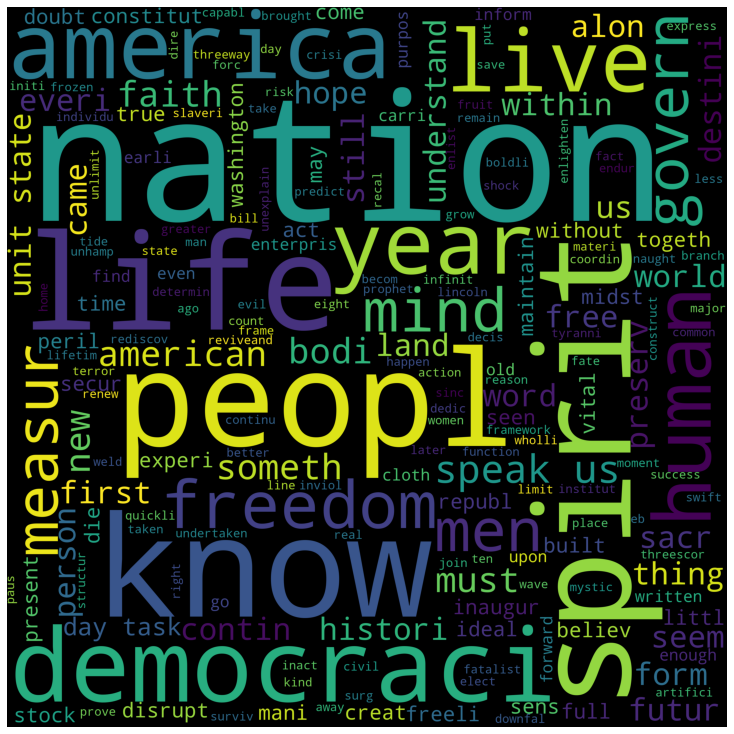

In [135]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(sp_cleaned.speeches[0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy speech (after cleaning)!!


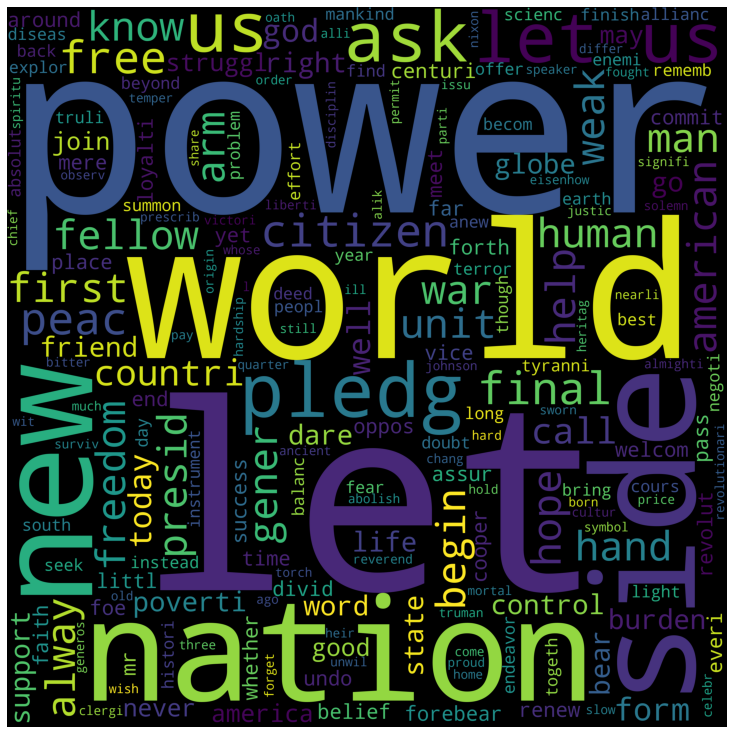

In [136]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(sp_cleaned.speeches[1]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy speech (after cleaning)!!")
plt.show()

Word Cloud for 1973-Nixon speech (after cleaning)!!


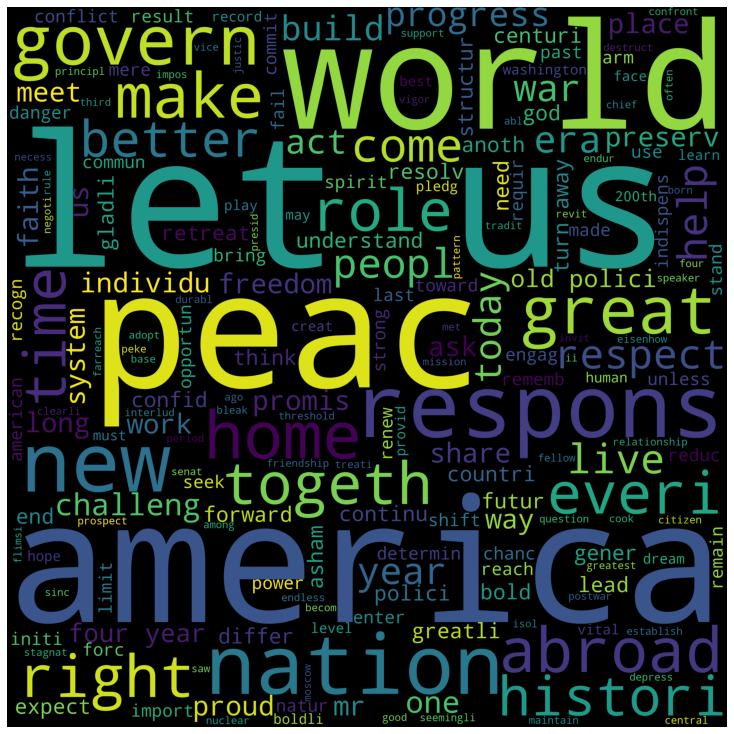

In [137]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(sp_cleaned.speeches[2]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon speech (after cleaning)!!")
plt.show()